In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv(r"C:\Users\shubh\Downloads\Swiggy_Pre_Processed_dataset.csv")
df

,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Rating Stars out of 5,Rating in text,Price range,Votes
0,Sultans of Spice,0,20,23,1300,1,1,4.1,3,3,314
1,The Fatty Bao - Asian Gastro Bar,0,56,1,2400,1,1,4.7,1,4,591
2,Toit,0,56,16,2000,0,0,4.8,1,4,270
3,Three Dots & A Dash,0,56,10,1300,1,0,3.9,2,3,365
4,Bombay Brasserie,0,56,21,1500,0,1,4.2,3,3,229
...,...,...,...,...,...,...,...,...,...,...,...
253,The Sizzling Salsa,12,95,16,1500,0,0,4.1,3,4,411
254,Global Local,12,131,21,1500,0,0,3.4,0,4,113
255,The Creamery,12,131,9,250,0,0,3.6,2,1,1109
256,The Food Lab,12,131,16,900,0,0,3.6,2,3,728


In [21]:
df['Locality'].value_counts()

Locality
47     12
59      7
23      6
56      6
112     5
       ..
39      1
26      1
93      1
132     1
20      1
Name: count, Length: 137, dtype: int64

In [22]:
df.columns

Index(['Restaurant Name', 'City', 'Locality', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       ' Rating Stars out of 5', 'Rating in text', 'Price range', 'Votes'],
      dtype='object')

In [23]:
col=[ 'City', 'Locality', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       ' Rating Stars out of 5', 'Votes']
x=df[col]
y=df['Price range']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= .25,random_state= 1)
print(len(x_train))
print(len(x_test))


193
65


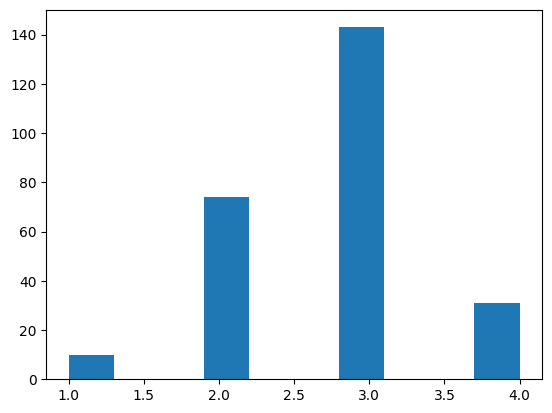

In [25]:
import matplotlib.pyplot as plt
plt.hist(df['Price range'])
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred_lr=lr.predict(x_test)

print('accuracy_score= ',accuracy_score(y_test,y_pred_lr))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred_lr))
print('classification_report \n',classification_report(y_test, y_pred_lr))

accuracy_score=  0.7538461538461538
confusion_matrix 
 [[ 0  3  0  0]
 [ 0 15  5  1]
 [ 0  5 33  2]
 [ 0  0  0  1]]
classification_report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.65      0.71      0.68        21
           3       0.87      0.82      0.85        40
           4       0.25      1.00      0.40         1

    accuracy                           0.75        65
   macro avg       0.44      0.63      0.48        65
weighted avg       0.75      0.75      0.75        65



KNeighbor classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [29]:
y_pred_knn=knn.predict(x_test)

print('accuracy_score= ',accuracy_score(y_test,y_pred_knn))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred_knn))
print('classification_report \n',classification_report(y_test, y_pred_knn))

accuracy_score=  0.8307692307692308
confusion_matrix 
 [[ 0  3  0  0]
 [ 0 17  4  0]
 [ 0  4 36  0]
 [ 0  0  0  1]]
classification_report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.71      0.81      0.76        21
           3       0.90      0.90      0.90        40
           4       1.00      1.00      1.00         1

    accuracy                           0.83        65
   macro avg       0.65      0.68      0.66        65
weighted avg       0.80      0.83      0.81        65



Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4)

In [31]:
y_pred_dt=dt.predict(x_test)

print('accuracy_score= ',accuracy_score(y_test,y_pred_dt))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred_dt))
print('classification_report \n',classification_report(y_test, y_pred_dt))

accuracy_score=  0.9230769230769231
confusion_matrix 
 [[ 2  0  1  0]
 [ 0 18  3  0]
 [ 0  0 39  1]
 [ 0  0  0  1]]
classification_report 
               precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      0.86      0.92        21
           3       0.91      0.97      0.94        40
           4       0.50      1.00      0.67         1

    accuracy                           0.92        65
   macro avg       0.85      0.87      0.83        65
weighted avg       0.94      0.92      0.92        65



Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',max_leaf_nodes=4,max_depth=5,min_samples_split=5)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=4,
                       min_samples_split=5)

In [33]:
y_pred_rf=rf.predict(x_test)

print('accuracy_score= ',accuracy_score(y_test,y_pred_rf))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred_rf))
print('classification_report \n',classification_report(y_test, y_pred_rf))

accuracy_score=  0.7846153846153846
confusion_matrix 
 [[ 0  3  0  0]
 [ 0 20  1  0]
 [ 0  9 31  0]
 [ 0  0  1  0]]
classification_report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.62      0.95      0.75        21
           3       0.94      0.78      0.85        40
           4       0.00      0.00      0.00         1

    accuracy                           0.78        65
   macro avg       0.39      0.43      0.40        65
weighted avg       0.78      0.78      0.77        65



To find which model is the best , here we can make a dataframe to get the details at one place

In [39]:
Pred={'LogReg':accuracy_score(y_test,y_pred_lr),
      'KNN':accuracy_score(y_test,y_pred_knn),
      'DTree':accuracy_score(y_test,y_pred_dt),
      'RForest':accuracy_score(y_test,y_pred_rf)}

res=pd.DataFrame(Pred,index=['Accuracy'])
res.T

,Accuracy
LogReg,0.753846
KNN,0.830769
DTree,0.923077
RForest,0.784615


From the above dataframe we can conclude that 'Decision Tree' is the best model , having 0.923 accuracy